# Machine Learning - Classification Assignment - Click Through Rate Prediction

Student - Kaustubh Nitin Patil



## Objective
As part of this assignment, predict whether a user will click on an ad or not. A classification method usually designed to solve such problems is best suited here. As part of this assignment, applied 3 classification methods taught in Course 3 – The introduction to Machine Learning.

### 1. Preparing the problem

importing the required libraries

In [47]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import os
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")

In [2]:
# read the data into a data frame
data=pd.read_csv('data.csv')


### 2. Summarize Data

In [3]:
# to display all the columns
pd.set_option('display.max_columns', None)
#showing first 5 rows
data.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [4]:
# showing last 5 rows
data.tail()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
99994,False,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,783d53a5,04f5b394,1,0,17239,320,50,1973,3,39,100148,23,10,3,23,15,0
99995,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,79117e3c,711ee120,1,0,22261,320,50,2545,0,167,100084,221,10,2,29,0,0
99996,True,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,e774692b,1f0bc64f,1,0,21276,320,50,2443,2,39,-1,23,10,2,22,15,1
99997,True,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,4815ea13,d787e91b,1,0,20093,300,250,2295,2,35,100081,23,10,5,25,8,1
99998,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,594a6636,5096d134,1,0,22677,320,50,2617,0,35,-1,51,10,1,28,1,0


In [5]:
# check datatypes, shape,null values
print('*******Dataframe Information**************************************************')
print(data.info())
print('*******Check count of Null Values*********************************************')
print(data.isna().sum())
print('*******Check count of Unique Values*********************************************')
print(data.nunique())

*******Dataframe Information**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 n



####  Dataset has 99,999 rows and 26 columns. There is no missing values present in dataset.


####  Categorical columns are - C1, banner_pos, site_id, site_domain, site_category, app_id, app_domain, app_category, device_id, device_ip, device_model, device_type, device_conn_type and from C14 t0 C21

####  banner position is already label encoded, site category and app category can be label encoded.  Remaning category fields need not be encoded as the number of unique valuesin these columns are too high. Encoding them will create too many feature columns.
 


#### Checking duplicate rows

In [6]:
data[data.duplicated()].shape

(658, 27)

In [7]:
# Drop the 658 duplicate records
data = data.drop_duplicates()
data

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,False,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,783d53a5,04f5b394,1,0,17239,320,50,1973,3,39,100148,23,10,3,23,15,0
99995,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,79117e3c,711ee120,1,0,22261,320,50,2545,0,167,100084,221,10,2,29,0,0
99996,True,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,927c68c6,e774692b,1f0bc64f,1,0,21276,320,50,2443,2,39,-1,23,10,2,22,15,1
99997,True,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,4815ea13,d787e91b,1,0,20093,300,250,2295,2,35,100081,23,10,5,25,8,1


In [8]:
data[data.duplicated()].shape

(0, 27)

#### Observation
658 Duplicate records in the dataset. This data can be dropped from the dataframe.

<hr>

### Descriptive statistics

In [9]:
#Statistical Summary of Numeric Variables
data.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.0,99341.000000,99341.000000,99341.000000,99341.000000
mean,1004.967264,0.290213,1.016458,0.329220,18846.561903,318.828882,60.338913,2113.226392,1.436627,226.056694,53294.197975,82.952185,10.0,2.593169,25.483828,11.310365,0.170836
std,1.094744,0.506145,0.532553,0.855082,4942.636368,21.578787,47.848698,607.163618,1.325966,350.392948,49952.107818,70.049904,0.0,1.725398,2.965049,5.940158,0.376367
min,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.000000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100084.000000,100.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


### Data visualizations

#### Target Variable

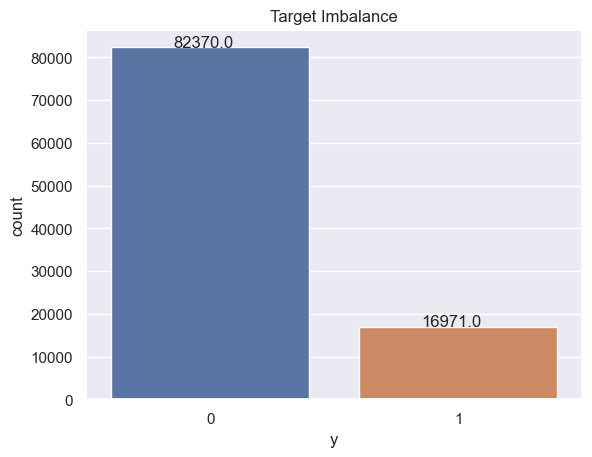

In [10]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data,x=data['y'])
plt.title("Target Imbalance")
#Iterate the returned axes of the countplot and show the count values at the top of the bars.
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

### Observation

#### ~16,980 people has clicked the advertisement and ~83,019 people have not clicked the advertisement. 

#### Advertisement Position

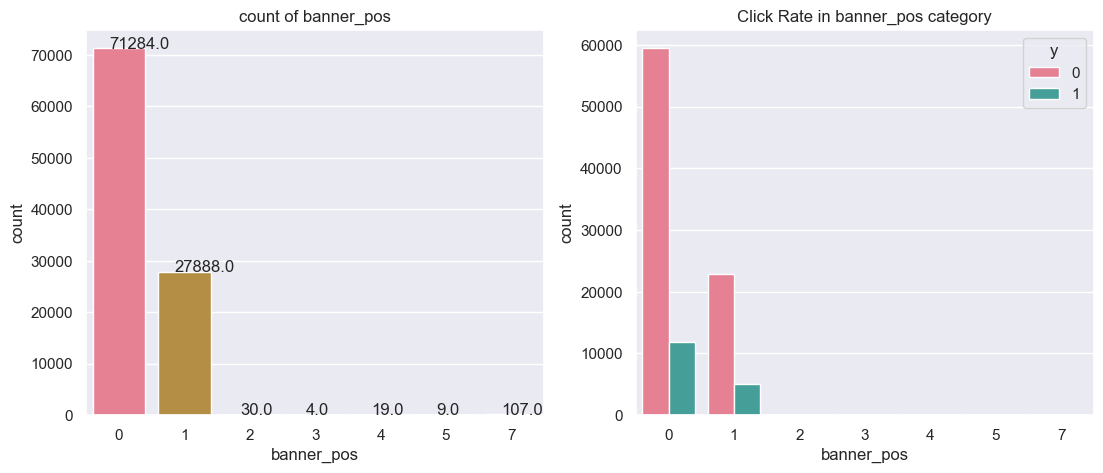

In [11]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
ax = sns.countplot(x=data['banner_pos'],palette='husl')
plt.title("count of banner_pos")
plt.subplot(1,2,2)
ax2 = sns.countplot(x=data['banner_pos'], hue = data['y'],palette="husl")
plt.title("Click Rate in banner_pos category")
# ax3=sns.countplot(x=data['device_type'],hue=data['y'],palette='husl')
# plt.title("count of device_type")

#Iterate the returned axes of the countplot and show the count values at the top of the bars.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#for p in ax.patches:
#   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.show()

#### Observation:
    
The banner position variable in the dataset is highly imbalanced. 71778 addvertisement in position zero. ~28,000 advertisement is in position 1. 

Banner Position 0 has ~10K+ clicks whereas Banner Position 1 has ~5K clicks. 

#### Device Type

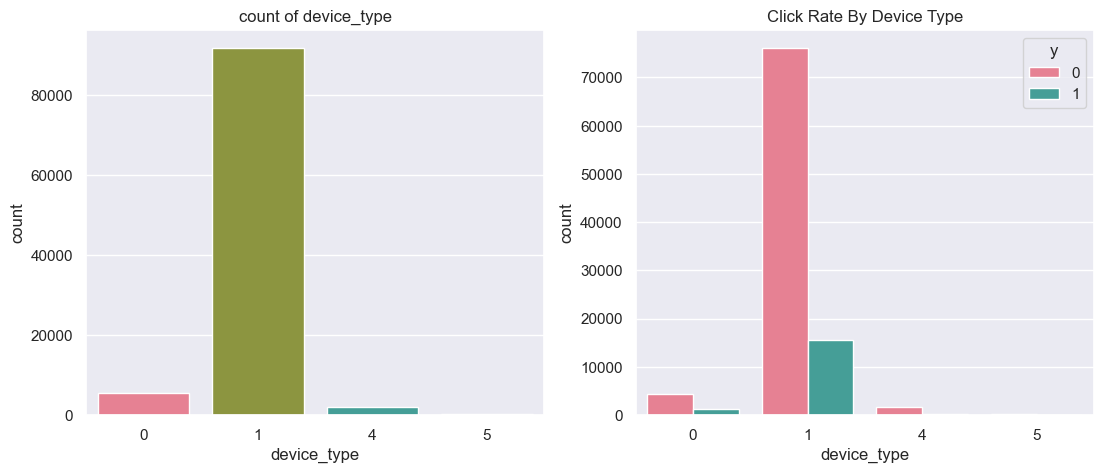

In [12]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=data['device_type'],palette='husl')
plt.title("count of device_type")
plt.subplot(1,2,2)
sns.countplot(x=data['device_type'], hue = data['y'],palette="husl")
plt.title("Click Rate By Device Type")
plt.show()

#### Observation:
    
Device Type 1 is majorly used. 

~16K clicks came from device type 1 

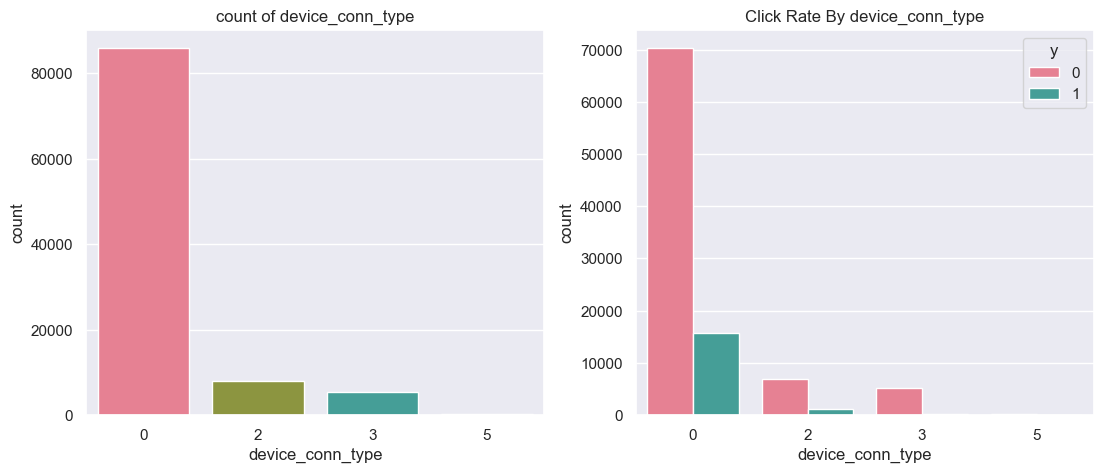

In [13]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=data['device_conn_type'],palette='husl')
plt.title("count of device_conn_type")
plt.subplot(1,2,2)
sns.countplot(x=data['device_conn_type'], hue = data['y'],palette="husl")
plt.title("Click Rate By device_conn_type")
plt.show()

Observation:
Connection Type 0 is majorly used and most of the clicks came from connecction type 0

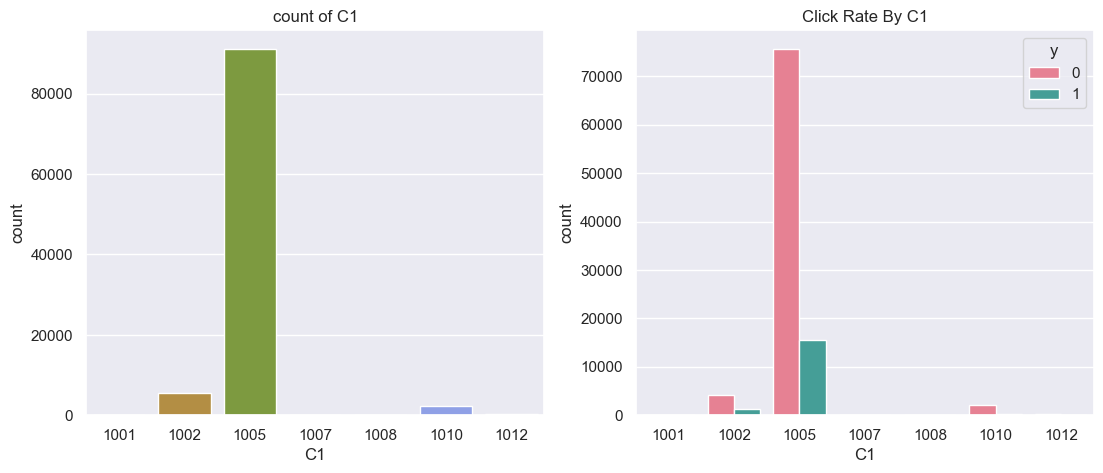

In [14]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=data['C1'],palette='husl')
plt.title("count of C1")
plt.subplot(1,2,2)
sns.countplot(x=data['C1'], hue = data['y'],palette="husl")
plt.title("Click Rate By C1")
plt.show()

#### Observation: 
C1 category 1005 is the major contributor of clicks

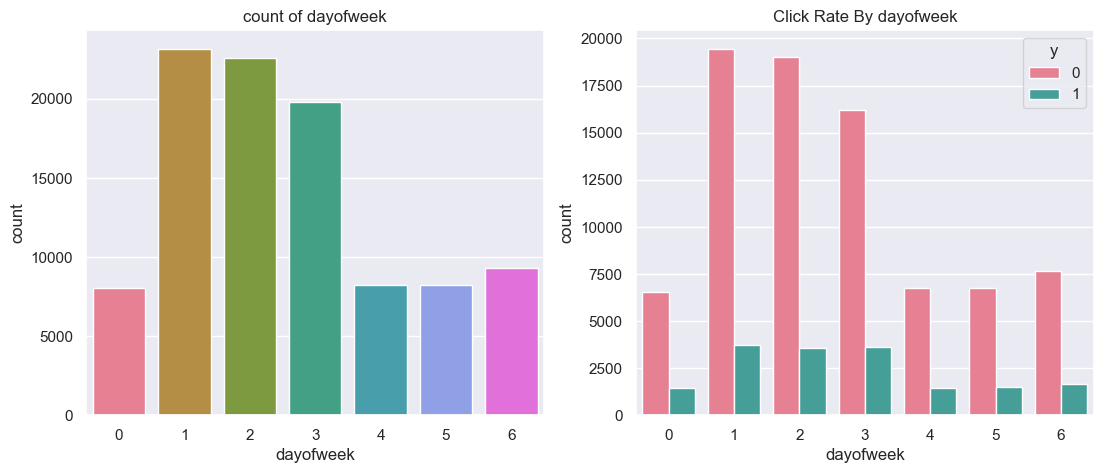

In [15]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=data['dayofweek'],palette='husl')
plt.title("count of dayofweek")
plt.subplot(1,2,2)
sns.countplot(x=data['dayofweek'], hue = data['y'],palette="husl")
plt.title("Click Rate By dayofweek")
plt.show()

Observation:
Monday, Tuesday and Wednesday are the peak days where more clicks are made 

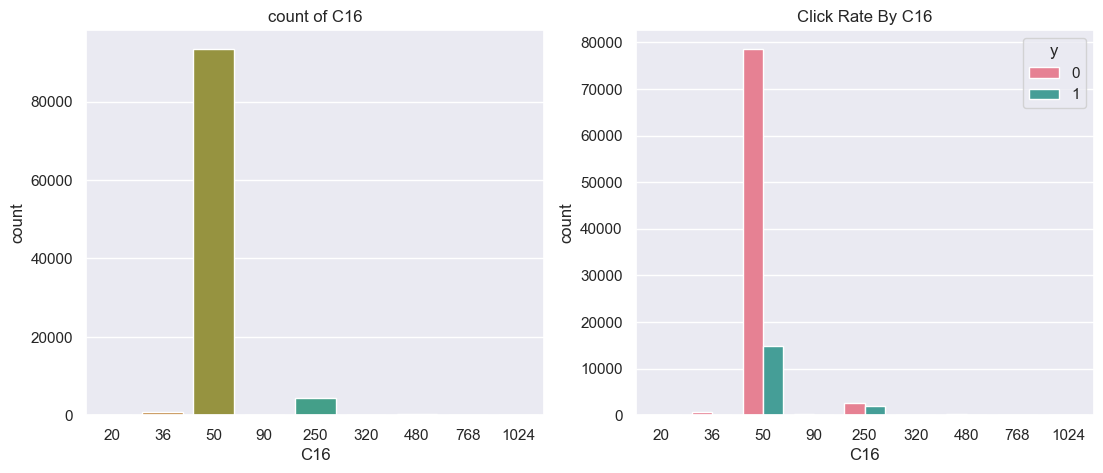

In [16]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=data['C16'],palette='husl')
plt.title("count of C16")
plt.subplot(1,2,2)
sns.countplot(x=data['C16'], hue = data['y'],palette="husl")
plt.title("Click Rate By C16")
plt.show()

#### Observation
For Category C16, Most of the clicks are from type 50

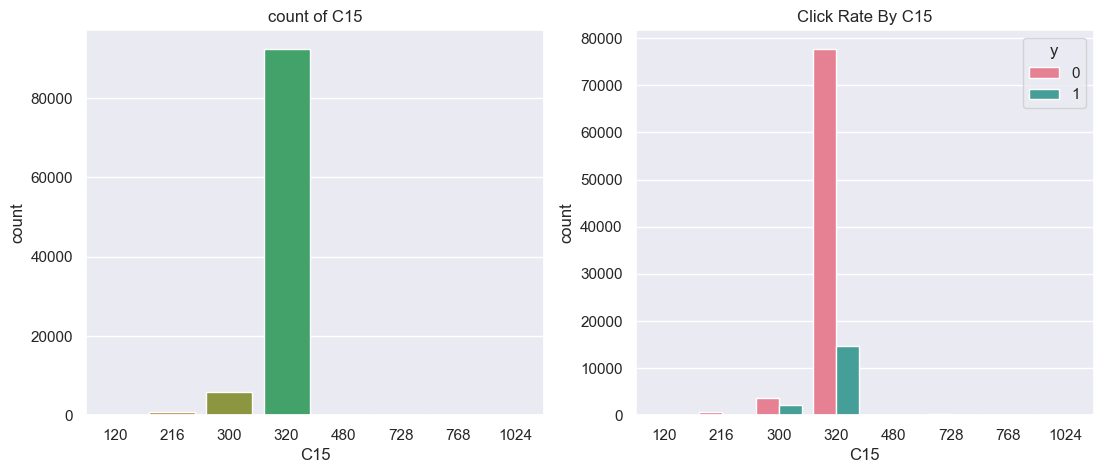

In [17]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=data['C15'],palette='husl')
plt.title("count of C15")
plt.subplot(1,2,2)
sns.countplot(x=data['C15'], hue = data['y'],palette="husl")
plt.title("Click Rate By C15")
plt.show()

### Observation 
For Category C15, Most of the clicks are from type 320

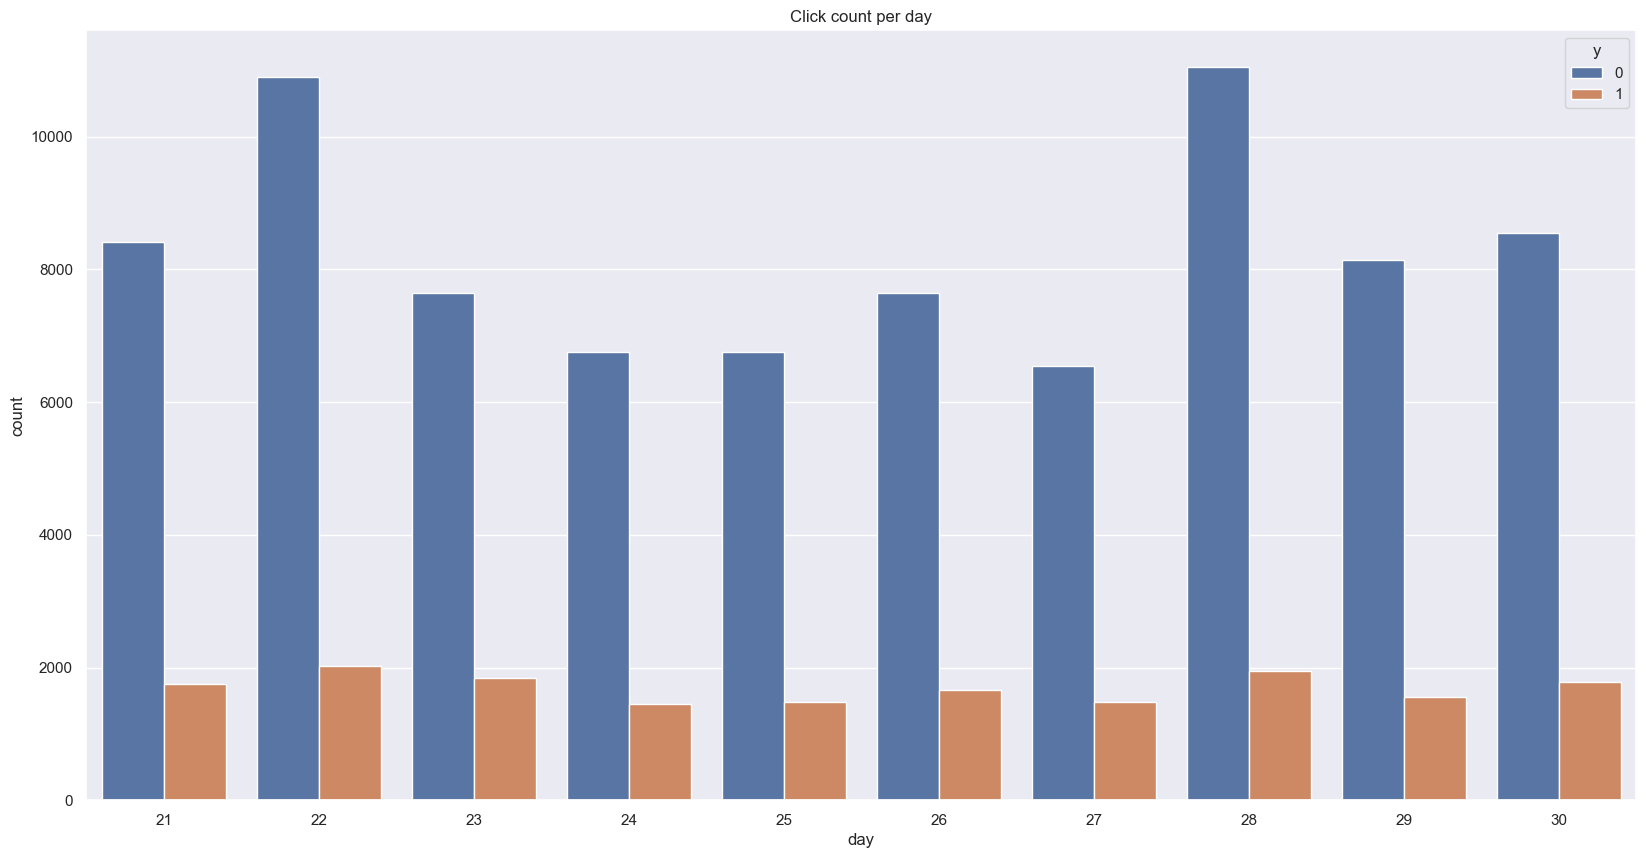

In [18]:
#Day VS Click
plt.figure(figsize=(20,10))
sns.countplot(x='day',hue='y',data=data)
plt.title("Click count per day")
plt.show()

#### Observation:
Successful click count is consistent throughput the day

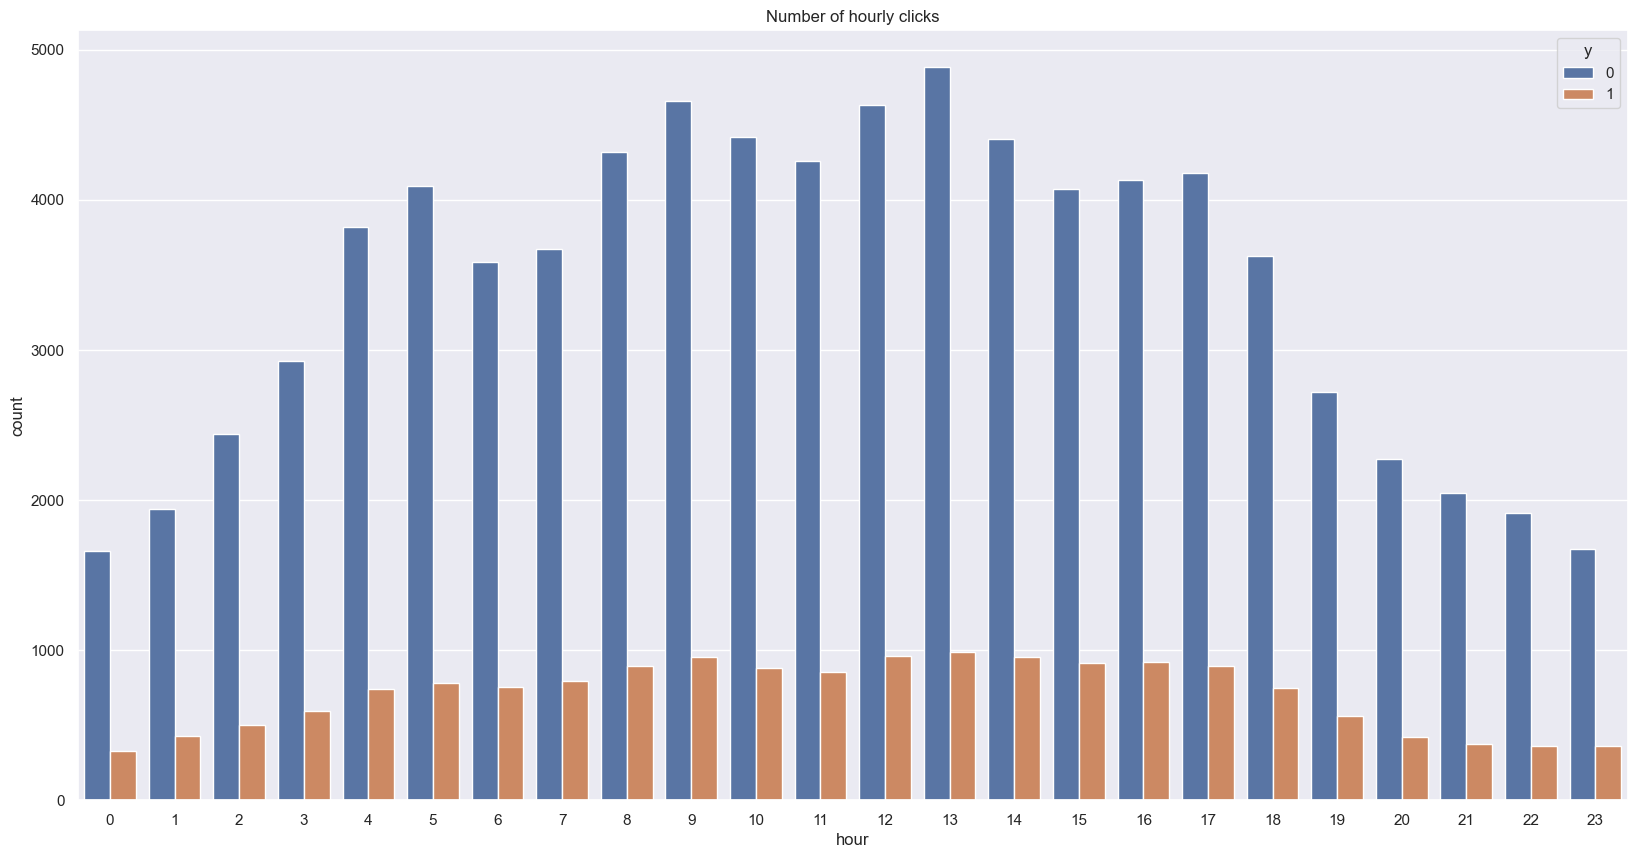

In [19]:
#Hour VS Click
plt.figure(figsize=(20,10))
sns.countplot(x='hour',hue='y',data=data)
plt.title("Number of hourly clicks")
plt.show()

Observation: 8 AM to 5 PM is when most of the add is clicked. 

### Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

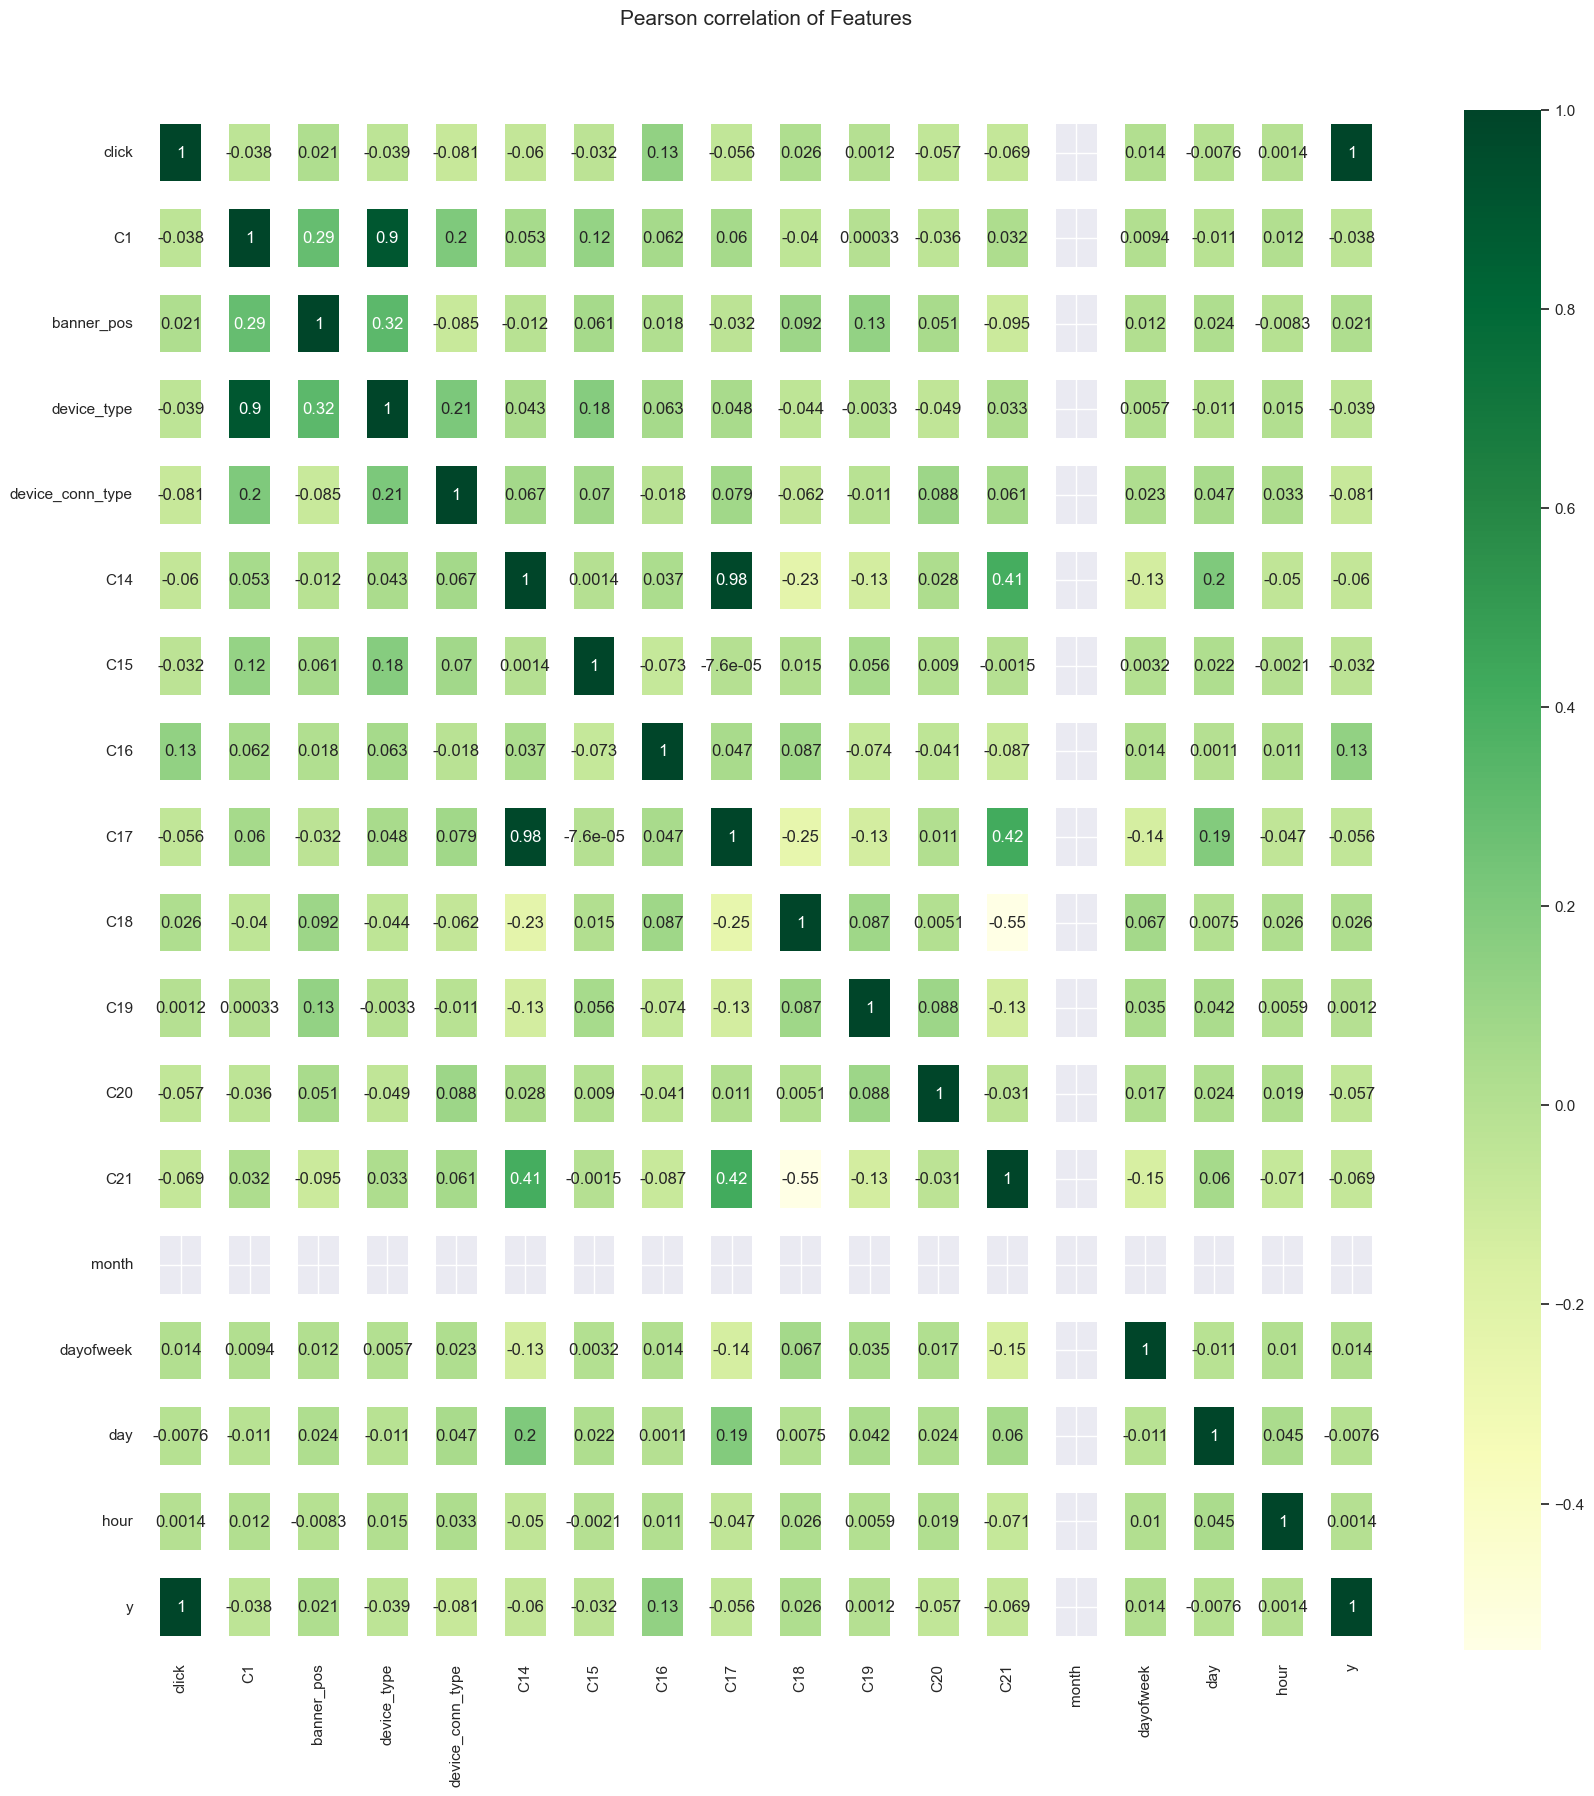

In [20]:
corr = data.corr()

f, ax = plt.subplots(figsize=(20,20))

sns.heatmap(corr, ax=ax, annot=True,linewidths=20,cmap='YlGn')
#sns.heatmap(corr, cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

### Observation : 
    Target variable 'y' is not affected by columns - Month, Day, C19

## 3. Prepare Data

In [68]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['site_category'] = labelEncoder.fit_transform(data['site_category'])
data['app_category'] = labelEncoder.fit_transform(data['app_category'])

In [69]:
data.dtypes


click                 bool
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category        int64
app_id              object
app_domain          object
app_category         int64
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

#### Seprating dependent and independent variables

In [70]:
x=data.drop(['y','click'],axis=1) #contain all  independent variable
y=data['y']           #dependent variable

In [71]:
x = x.drop(['site_id', 'site_domain', 'app_id','app_domain','device_id','device_ip','device_model' ], axis=1)
print(x)

         C1  banner_pos  site_category  app_category  device_type  \
0      1005           1             17             0            1   
1      1005           1             17             0            1   
2      1005           0              1             0            1   
3      1002           0              5             0            0   
4      1005           0              1             0            1   
...     ...         ...            ...           ...          ...   
99994  1005           0              3             0            1   
99995  1005           0              1             0            1   
99996  1005           0              5            16            1   
99997  1005           0              3             0            1   
99998  1005           0              1             0            1   

       device_conn_type    C14  C15  C16   C17  C18  C19     C20  C21  month  \
0                     0  22683  320   50  2528    0   39  100075  221     10   
1          

In [156]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   C1                99341 non-null  int64
 1   banner_pos        99341 non-null  int64
 2   site_category     99341 non-null  int32
 3   app_category      99341 non-null  int32
 4   device_type       99341 non-null  int64
 5   device_conn_type  99341 non-null  int64
 6   C14               99341 non-null  int64
 7   C15               99341 non-null  int64
 8   C16               99341 non-null  int64
 9   C17               99341 non-null  int64
 10  C18               99341 non-null  int64
 11  C19               99341 non-null  int64
 12  C20               99341 non-null  int64
 13  C21               99341 non-null  int64
 14  month             99341 non-null  int64
 15  dayofweek         99341 non-null  int64
 16  day               99341 non-null  int64
 17  hour              99341 non-nul

### Observation:
We can remove less important features from the data set

In [157]:
# x=x.drop(['C17','C18','C19', 'C21','app_category','site_category'],axis=1)
x=x.drop(['month','C15','C19', 'C21','app_category'],axis=1)

#### Handling Imbalanced data

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

spliting of data into train and test data

Original dataset shape Counter({0: 82370, 1: 16971})
Resampled dataset shape Counter({0: 82370, 1: 82370})


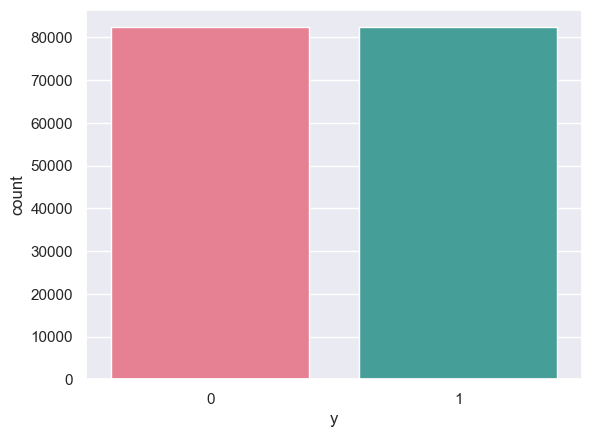

In [78]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(x=y_new,palette='husl')
plt.show()

#### Perform a train-test split in the data set (the usual split followed in the industry is 70-30 or 80-20).

In [72]:
#dividing the dataset into training and testing

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(69538, 18) (29803, 18) (69538,) (29803,)


####  Model Selection

Problem can be identified as Binary Classification (wheather user will click on a add or not)

Dataset has more than 99K records

cannot go with SVM Classifier as it takes more time to train as dataset increase

Idea is to start selection of models as:

1.Logistic Regression

2.Decision Tree

3.Random Forest


#### 1.Logistic Regression

In [73]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.8300506660403315
ROC_AUC Score: 0.5424742725152205


In [74]:
print(classification_report(pred,ytest))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91     29732
           1       0.00      0.25      0.01        71

    accuracy                           0.83     29803
   macro avg       0.50      0.54      0.46     29803
weighted avg       1.00      0.83      0.90     29803



### ROC Curve

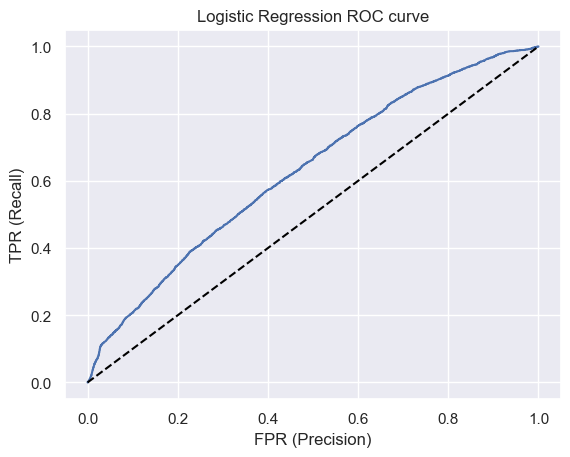

In [162]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

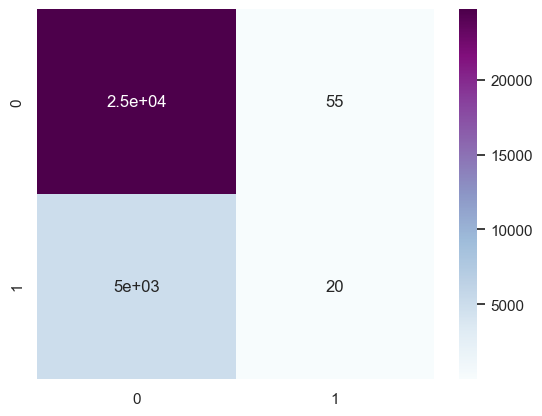

In [163]:
cm=confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

### 2. Decision Tree classsifier

In [75]:
model=DecisionTreeClassifier()
model=model.fit(xtrain,ytrain)
pred1=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_dt=accuracy_score(ytest,pred)
recall_dt=recall_score(ytest,pred)
precision_dt=precision_score(ytest,pred)
f1score_dt=f1_score(ytest,pred)
AUC_DT=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_DT)
print(classification_report(pred1,ytest))

Accuracy :  0.8300506660403315
ROC_AUC Score: 0.5424742725152205
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     25861
           1       0.21      0.27      0.23      3942

    accuracy                           0.77     29803
   macro avg       0.55      0.56      0.55     29803
weighted avg       0.79      0.77      0.78     29803



#### 2.RandomForest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.796866087306647
ROC_AUC Score: 0.5847814440660741


In [166]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     26918
           1       0.18      0.32      0.23      2885

    accuracy                           0.80     29803
   macro avg       0.55      0.58      0.56     29803
weighted avg       0.85      0.80      0.82     29803



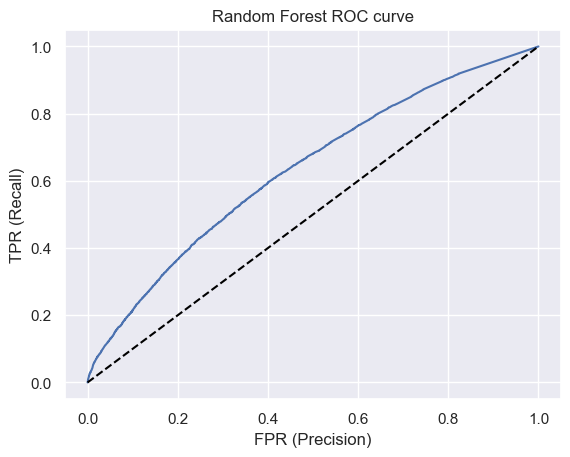

In [167]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

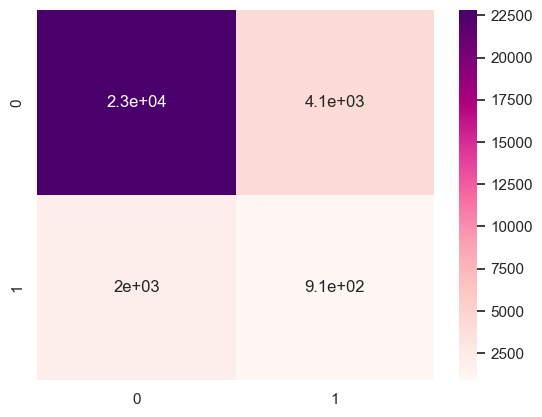

In [168]:
cm=confusion_matrix(y_pred,ytest)
sns.heatmap(cm,annot=True,cmap='RdPu')
plt.show()

#### Answer 6 -  Comparing the model

In [169]:
ind=['Logistic regression','DecisionTree Classifier','RandomforestClassifier']
data={"Accuracy":[acc_lr,acc_dt,acc_rf],
      "Recall":[recall_lr,recall_dt,recall_rf],
      "Precision":[precision_lr,precision_dt,precision_rf],
    'f1_score':[f1score_lr,f1score_dt,f1score_rf],
      "ROC_AUC":[AUC_LR,AUC_DT,AUC_RF]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.830051,0.003976,0.266667,0.007835,0.549069
DecisionTree Classifier,0.830051,0.003976,0.266667,0.007835,0.549069
RandomforestClassifier,0.795759,0.181710,0.316811,0.230954,0.581951


### Feature Selection

#### Performing Feature Selection using Tree based method

In [62]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x, y)
df=pd.DataFrame(clf.feature_importances_,index=x.columns)
df.sort_values(0,ascending=True)

,0
month,0.000000
device_type,0.004440
C1,0.005077
C15,0.007153
banner_pos,0.014218
device_conn_type,0.018567
C18,0.021784
C21,0.022007
C16,0.022206
C19,0.022626


##### Selecting only those feature who have a value atleast > 1 which is less but is better to use those features instead of just 2 or 3 

In [54]:
col=data[['banner_pos', 'device_conn_type',
       'C16', 'C21', 'C19', 'C18', 'app_category', 'site_category', 'C17',
       'dayofweek', 'day', 'C20', 'C14', 'hour']]

In [55]:
col

,banner_pos,device_conn_type,C16,C21,C19,C18,app_category,site_category,C17,dayofweek,day,C20,C14,hour
0,1,0,50,221,39,0,0,17,2528,1,28,100075,22683,14
1,1,0,50,16,39,2,0,17,1934,2,22,-1,17037,19
2,0,0,50,23,167,3,0,1,2552,3,23,100202,22155,18
3,0,0,50,23,167,3,0,5,2478,2,22,100074,21591,19
4,0,0,50,79,35,0,0,1,1722,1,21,-1,15708,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,50,23,39,3,0,3,1973,3,23,100148,17239,15
99995,0,0,50,221,167,0,0,1,2545,2,29,100084,22261,0
99996,0,0,50,23,39,2,16,5,2443,2,22,-1,21276,15
99997,0,0,250,23,35,2,0,3,2295,5,25,100081,20093,8


##### Spliting & scaling the data again 

In [56]:
#dividing the dataset into training and testing

xtrain1,xtest1,ytrain1,ytest1=train_test_split(col,y,test_size=.30,random_state=0)
print(xtrain1.shape,xtest1.shape,ytrain1.shape,ytest1.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain2=scaler.fit_transform(xtrain1)
xtest2=scaler.transform(xtest1)

(69538, 14) (29803, 14) (69538,) (29803,)


#### Logistic Regression model with Selected features

In [64]:
model=LogisticRegression()
model=model.fit(xtrain2,ytrain1)
pred=model.predict(xtest2)
lr_probability =model.predict_proba(xtest2)[:,1]


acc_lr_feat=accuracy_score(ytest1,pred)
recall_lr_feat=recall_score(ytest1,pred)
precision_lr_feat=precision_score(ytest1,pred)
f1score_lr_feat=f1_score(ytest1,pred)
AUC_LR_feat=roc_auc_score(pred,ytest1)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest1,pred))
print("ROC_AUC Score:",AUC_LR_feat)

Accuracy :  0.8300842197094253
ROC_AUC Score: 0.5476721360794382


#### Decision Tree Classifier with Selected features

In [65]:
model=DecisionTreeClassifier()
model=model.fit(xtrain2,ytrain1)
pred=model.predict(xtest2)
lr_probability =model.predict_proba(xtest2)[:,1]


acc_dt_feat=accuracy_score(ytest1,pred)
recall_dt_feat=recall_score(ytest1,pred)
precision_dt_feat=precision_score(ytest1,pred)
f1score_dt_feat=f1_score(ytest1,pred)
AUC_DT_feat=roc_auc_score(pred,ytest1)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest1,pred))
print("ROC_AUC Score:",AUC_DT_feat)
print(classification_report(pred,ytest1))

Accuracy :  0.7687816662752072
ROC_AUC Score: 0.5550986456605388
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     25854
           1       0.21      0.26      0.23      3949

    accuracy                           0.77     29803
   macro avg       0.55      0.56      0.55     29803
weighted avg       0.79      0.77      0.78     29803



#### Random forest Classifier with Selected features

In [66]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain2, ytrain1)
y_pred = randomforest.predict(xtest2)
RF_probability = randomforest.predict_proba(xtest2)[:,1]



AUC_RF_feat=roc_auc_score(y_pred,ytest1)
acc_rf_feat=accuracy_score(ytest1,y_pred)
recall_rf_feat=recall_score(ytest1,y_pred)
precision_rf_feat=precision_score(ytest1,y_pred)
f1score_rf_feat=f1_score(ytest1,y_pred)

print(accuracy_score(y_pred,ytest1))
print("ROC_AUC Score:",AUC_RF)

0.795792369895648
ROC_AUC Score: 0.5817638926835026


In [58]:
print(classification_report(y_pred,ytest1))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     26948
           1       0.18      0.32      0.23      2855

    accuracy                           0.80     29803
   macro avg       0.55      0.58      0.56     29803
weighted avg       0.85      0.80      0.82     29803



In [60]:
round(f1score_rf,2)

0.23

In [77]:
ind=['Logistic regression','DecisionTree Classifier','RandomforestClassifier',"LogisticRegression_after_feature_selection",
     'DecisionTree_after_feature_selection','RandomForest_after_feature_selection']
data={"Accuracy":[acc_lr,acc_dt,acc_rf,acc_lr_feat,acc_dt_feat,acc_rf_feat],
      "Recall":[recall_lr,recall_dt,recall_rf,recall_lr_feat,recall_dt_feat,recall_rf_feat],
      "Precision":[precision_lr,precision_dt,precision_rf,precision_lr_feat,precision_dt_feat,precision_rf_feat],
    'f1_score':[f1score_lr,f1score_dt,f1score_rf,f1score_lr_feat,f1score_dt_feat,f1score_rf_feat],
      "ROC_AUC":[AUC_LR,AUC_DT,AUC_RF,AUC_LR_feat,AUC_DT_feat,AUC_RF_feat]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.830051,0.003579,0.253521,0.007057,0.542474
DecisionTree Classifier,0.830051,0.003579,0.253521,0.007057,0.542474
RandomforestClassifier,0.796866,0.184095,0.321975,0.234252,0.584781
LogisticRegression_after_feature_selection,0.830084,0.003777,0.263889,0.007448,0.547672
DecisionTree_after_feature_selection,0.768782,0.207555,0.264371,0.232543,0.555099
RandomForest_after_feature_selection,0.795792,0.182704,0.317554,0.231954,0.582390


In [79]:
#dividing the dataset into training and testing

xtrain2,xtest2,ytrain2,ytest2=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain2.shape,xtest2.shape,ytrain2.shape,ytest2.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain3=scaler.fit_transform(xtrain2)
xtest3=scaler.transform(xtest2)

(115318, 18) (49422, 18) (115318,) (49422,)


In [80]:
model=LogisticRegression()
model=model.fit(xtrain3,ytrain2)
pred=model.predict(xtest3)
lr_probability =model.predict_proba(xtest3)[:,1]


acc_lr_resamp=accuracy_score(ytest2,pred)
recall_lr_resamp=recall_score(ytest2,pred)
precision_lr_resamp=precision_score(ytest2,pred)
f1score_lr_resamp=f1_score(ytest2,pred)
AUC_LR_resamp=roc_auc_score(pred,ytest2)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest2,pred))
print("ROC_AUC Score:",AUC_LR_resamp)

Accuracy :  0.5932985310185748
ROC_AUC Score: 0.5932636089115119


In [81]:
model=DecisionTreeClassifier()
model=model.fit(xtrain3,ytrain2)
pred=model.predict(xtest3)
lr_probability =model.predict_proba(xtest3)[:,1]


acc_dt_resamp=accuracy_score(ytest2,pred)
recall_dt_resamp=recall_score(ytest2,pred)
precision_dt_resamp=precision_score(ytest2,pred)
f1score_dt_resamp=f1_score(ytest2,pred)
AUC_DT_resamp=roc_auc_score(pred,ytest2)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest2,pred))
print("ROC_AUC Score:",AUC_DT_resamp)
print(classification_report(pred,ytest2))

Accuracy :  0.8158917081461697
ROC_AUC Score: 0.8227137700868368
              precision    recall  f1-score   support

           0       0.74      0.87      0.80     20976
           1       0.89      0.78      0.83     28446

    accuracy                           0.82     49422
   macro avg       0.82      0.82      0.81     49422
weighted avg       0.83      0.82      0.82     49422



In [82]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain3, ytrain2)
y_pred = randomforest.predict(xtest3)
RF_probability = randomforest.predict_proba(xtest3)[:,1]



AUC_RF_resamp=roc_auc_score(y_pred,ytest2)
acc_rf_resamp=accuracy_score(ytest2,y_pred)
recall_rf_resamp=recall_score(ytest2,y_pred)
precision_rf_resamp=precision_score(ytest2,y_pred)
f1score_rf_resamp=f1_score(ytest2,y_pred)

print(accuracy_score(y_pred,ytest2))
print("ROC_AUC Score:",AUC_RF_resamp)

0.8321192990975679
ROC_AUC Score: 0.8404724881148044


In [83]:
ind=['Logistic regression','DecisionTree Classifier','RandomforestClassifier',"LogisticRegression_after_feature_selection",
     'DecisionTree_after_feature_selection','RandomForest_after_feature_selection','LogisticRegression_after_resampling',
     'DecisionTree_after_resampling','RandomForest_after_resampling']
data={"Accuracy":[acc_lr,acc_dt,acc_rf,acc_lr_feat,acc_dt_feat,acc_rf_feat,acc_lr_resamp,acc_dt_resamp,acc_rf_resamp],
      "Recall":[recall_lr,recall_dt,recall_rf,recall_lr_feat,recall_dt_feat,recall_rf_feat,recall_lr_resamp,recall_dt_resamp,recall_rf_resamp],
      "Precision":[precision_lr,precision_dt,precision_rf,precision_lr_feat,precision_dt_feat,precision_rf_feat,precision_lr_resamp,precision_dt_resamp,precision_rf_resamp],
    'f1_score':[f1score_lr,f1score_dt,f1score_rf,f1score_lr_feat,f1score_dt_feat,f1score_rf_feat,f1score_lr_resamp,f1score_dt_resamp,f1score_rf_resamp],
      "ROC_AUC":[AUC_LR,AUC_DT,AUC_RF,AUC_LR_feat,AUC_DT_feat,AUC_RF_feat,AUC_LR_resamp,AUC_DT_resamp,AUC_RF_resamp]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.830051,0.003579,0.253521,0.007057,0.542474
DecisionTree Classifier,0.830051,0.003579,0.253521,0.007057,0.542474
RandomforestClassifier,0.796866,0.184095,0.321975,0.234252,0.584781
LogisticRegression_after_feature_selection,0.830084,0.003777,0.263889,0.007448,0.547672
DecisionTree_after_feature_selection,0.768782,0.207555,0.264371,0.232543,0.555099
RandomForest_after_feature_selection,0.795792,0.182704,0.317554,0.231954,0.582390
LogisticRegression_after_resampling,0.593299,0.601020,0.595328,0.598161,0.593264
DecisionTree_after_resampling,0.815892,0.888634,0.777579,0.829405,0.822714
RandomForest_after_resampling,0.832119,0.910168,0.788933,0.845225,0.840472


### We can clearly conclude that for Random Forest Classifier we are getting better f1score after we do Resampling as we are having data imbalance issue with the target variable

## Conclusion

### 1 : Clicks are originated from the below categories - 

  
  ##### a) Most of the advertisement clicks came from postion 0 and second most clicks are from position 1. Negligible clicks came from other banner positions.

   #####  b) Most of the clicks came from device type 1.

   #####  c) Almost all the clicks came from Device Connection Type 0.

   #####  d) Almost all the clicks came from Category C1.

   #####  e) Monday, Tuesday and Wednesday are the peak days where more clicks are made.

   #####  f) For Category C16, Most of the clicks are from type 50

   #####  g) For Category C15, Most of the clicks are from type 320

   #####  h) 8 AM to 5 PM is when most of the add is clicked.



### 2 : Comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.